   #                                            Avocado Project
# Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


# XGB Regressor Model
 
# Step 1: importing necessary libraries and load the data 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading dataset
price=pd.read_csv(r'C:\Users\HP\avocado.csv')
price


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


The dataset can be seen in two angles to find the region and find the average price .
Region is a classification  one and Average price is a regression.
first i am considering the Average price as a target variable and remaining are features.


Thses are the columns in the given dataset:

1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. totalbags - Size of the bags
7. smallbags - Size of the bags
8. largebags - Size of the bags
9. Xlargebags - Size of the bags
10. Total Volume - Total number of avocados sold
11. 4046 - Total number of avocados with PLU 4046 sold
12. 4225 - Total number of avocados with PLU 4225 sold
13. 4770 - Total number of avocados with PLU 4770 sold

# Step 2: Exploratory Data Analysis(EDA)

In [3]:
#checking the duplicates values
price.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Length: 18249, dtype: bool

In [4]:

price.duplicated().value_counts()

False    18249
dtype: int64

luckily there is no duplicate data in the given dataset.

In [5]:
price.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
#droping the unnamed column
price=price.drop('Unnamed: 0',axis=1)
price.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
#checking null values
price.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Yes, there are no missing values in the given dataset.

In [8]:
#Getting the normal summary and statistical information of the data
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


From this we get information about type of data presented i.e.,3object type , 9 float64 and 1 int64(3 categorical , 10 numerical data).

In [9]:
#finding the unique values
price.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [10]:
price.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

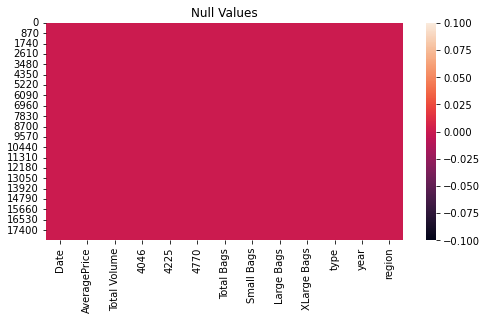

In [11]:
#Visualizing null values
plt.figure(figsize=[8,4])
sns.heatmap(price.isna())
plt.title("Null Values")
plt.show()


In [12]:
#Checking unique values of target column
price['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [13]:
#Checking for empty observations
price.loc[price['AveragePrice'] == " "]


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


Yes, there is no empty observations in the target variable.

In [14]:
# extracting month and date from date column in the given dataset
price["Date"]=pd.to_datetime(price["Date"])
price["Month"]=price["Date"].dt.month
price["Day"]=price["Date"].dt.day

In [15]:
price.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [16]:
price=price.drop('Date',axis=1)

In [17]:
#finding the shape of the dataset
price.shape

(18249, 14)

month and date columns are sucessfully added on the end of the dataset.

In [18]:
#checking the data types
price.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

In [19]:
price.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


As per my observation, the value count is same in all the columns which indicates no missing data.
The difference between the mean and standard devaition of each is not very less.
The mean value is more than 50% of median in all columns so, there will skewness problem.
Also we can have min, 75%, max values.

# Step3 : Visualization

In [20]:
#converting continuous and categorical columns
continuous_columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_columns = ['year', 'Day', 'Month', 'type', 'region']

In [21]:
price.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

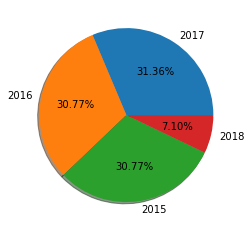

In [22]:
#Ploting pie chart for years
labels='2017','2016','2015','2018'
fig, ax = plt.subplots()
ax.pie(price['year'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

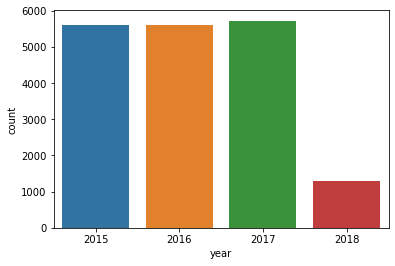

In [23]:
#Count plot for year
sns.countplot(price['year']);

In [24]:
price.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

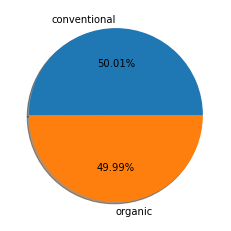

In [25]:
#Ploting pie chart for type
labels='conventional','organic'
fig, ax = plt.subplots()
ax.pie(price['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

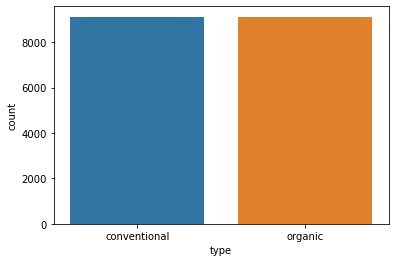

In [26]:
#Count plot for type
sns.countplot(price['type'])

<AxesSubplot:xlabel='Month', ylabel='count'>

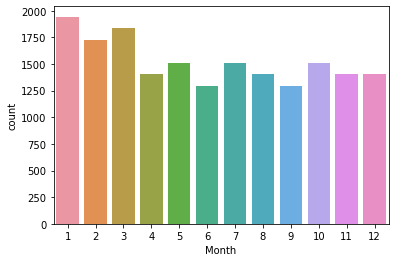

In [27]:
#Count plot for Month
sns.countplot(price['Month'])

<AxesSubplot:xlabel='Day', ylabel='count'>

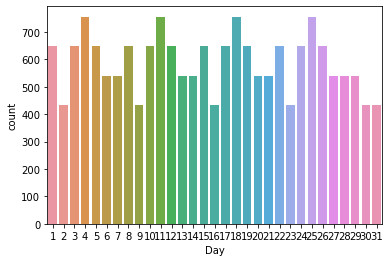

In [28]:
#Count plot for Day
sns.countplot(price['Day'])

<AxesSubplot:xlabel='region', ylabel='count'>

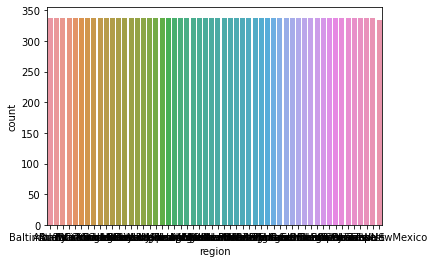

In [29]:
#Count plot for region
sns.countplot(price['region'])

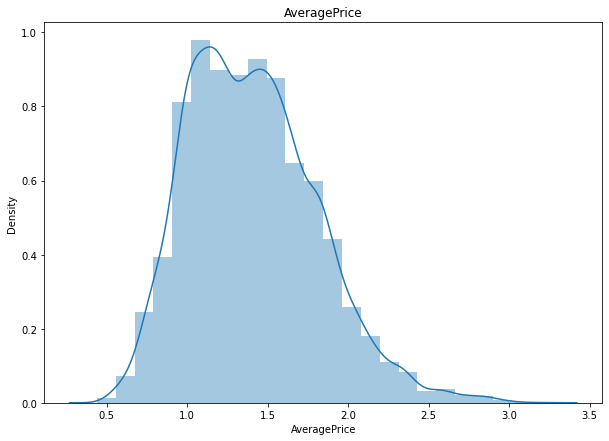

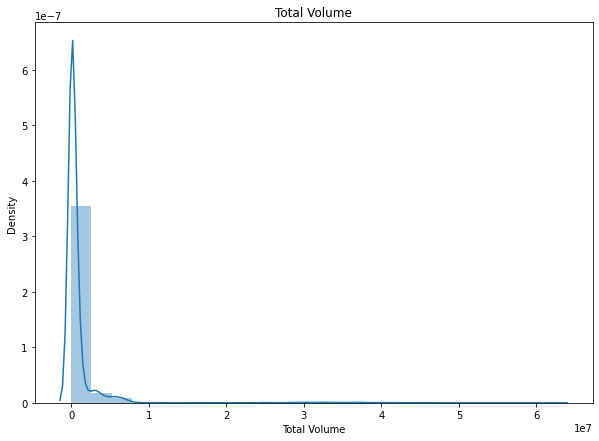

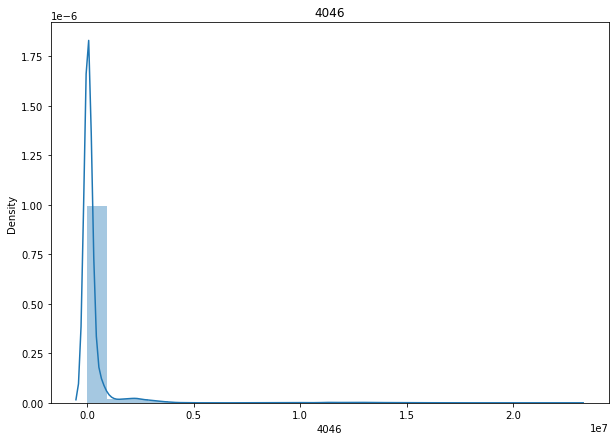

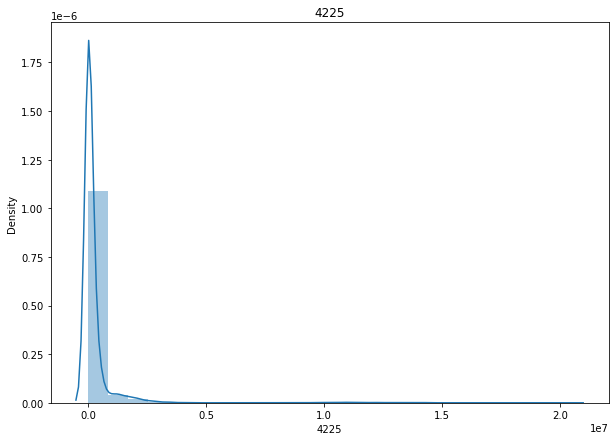

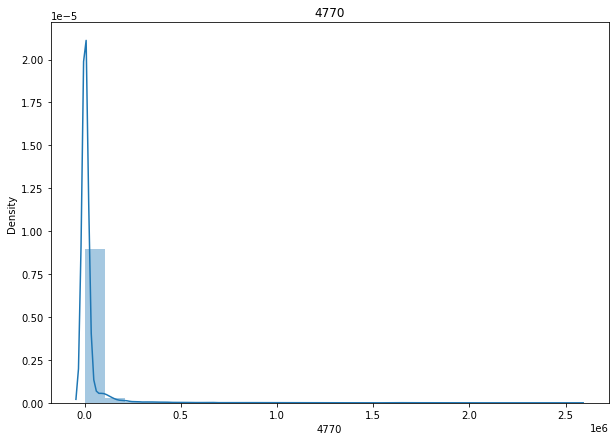

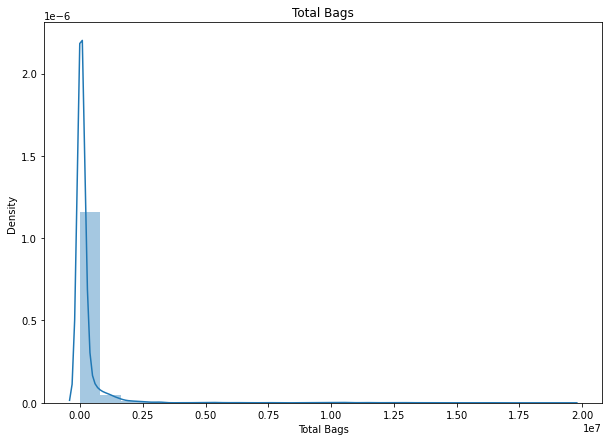

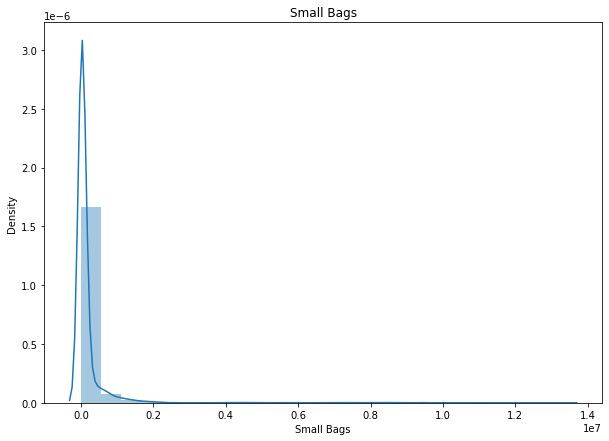

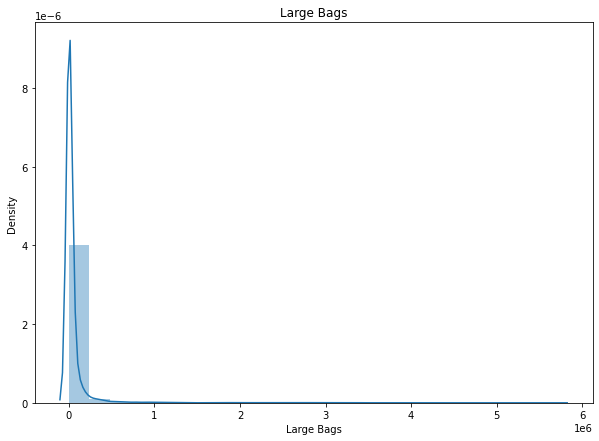

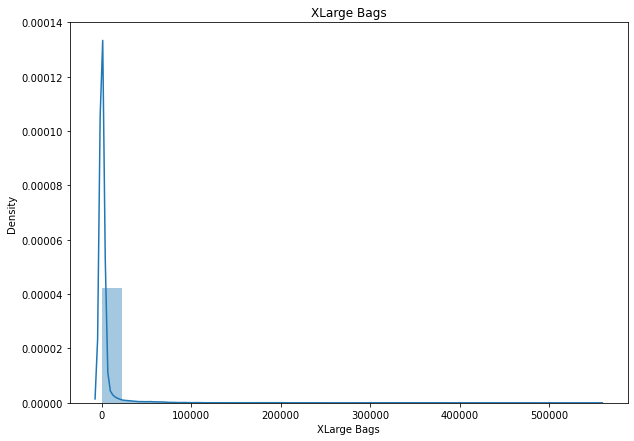

In [30]:
for k in price[continuous_columns]:              
    plt.figure(figsize = (10, 7))
    sns.distplot(price[k], bins = 24)
    plt.title(k)
    plt.show()


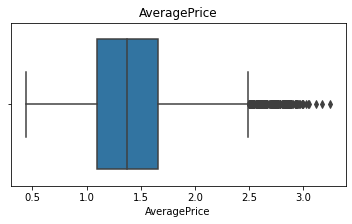

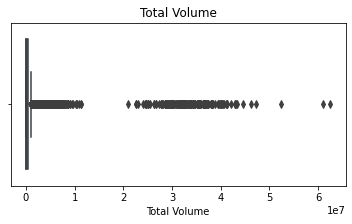

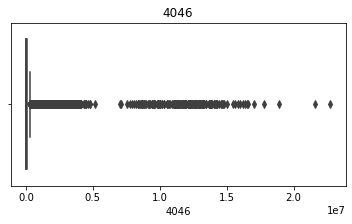

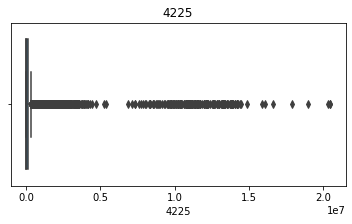

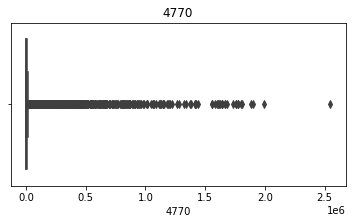

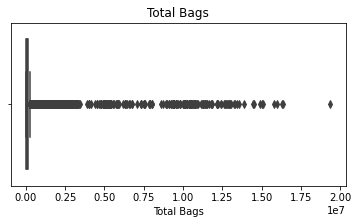

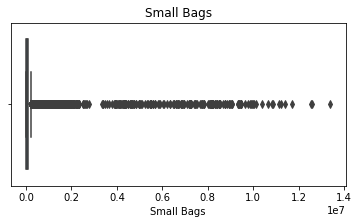

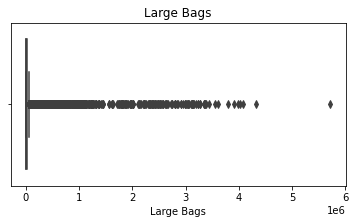

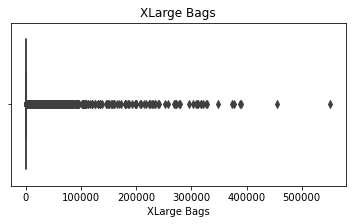

In [31]:
for k in price[continuous_columns]:              
    plt.figure(figsize = (6, 3))
    sns.boxplot(price[k])
    plt.title(k)
    plt.show()


# Bivariate analysis

<AxesSubplot:title={'center':'Comparision Total Bags and Small Bags'}, xlabel='Total Bags', ylabel='Small Bags'>

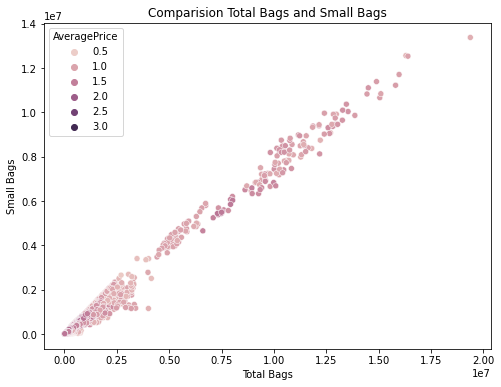

In [32]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and Small Bags')
sns.scatterplot(price['Total Bags'],price['Small Bags'],hue=price["AveragePrice"])

<AxesSubplot:title={'center':'Comparision 4046 and 4225'}, xlabel='4046', ylabel='4225'>

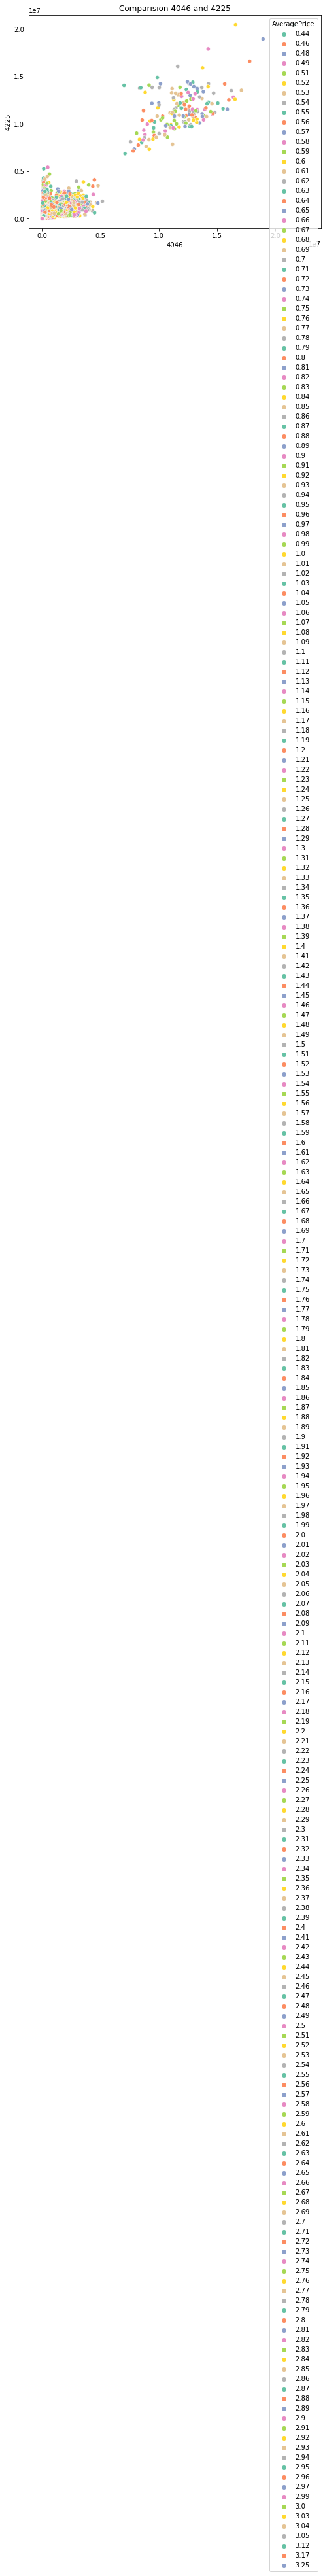

In [33]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision 4046 and 4225')
sns.scatterplot(price['4046'],price['4225'],hue=price["AveragePrice"],palette='Set2')

<AxesSubplot:title={'center':'Comparision Average Price and Total Volume'}, xlabel='AveragePrice', ylabel='Total Volume'>

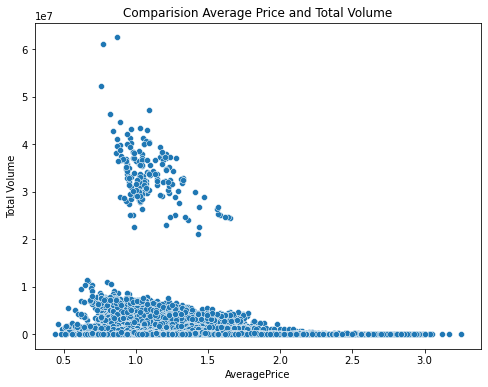

In [34]:
#Comparision between feature and target using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Average Price and Total Volume')
sns.scatterplot(price['AveragePrice'],price['Total Volume'])

# Multivariate analysis

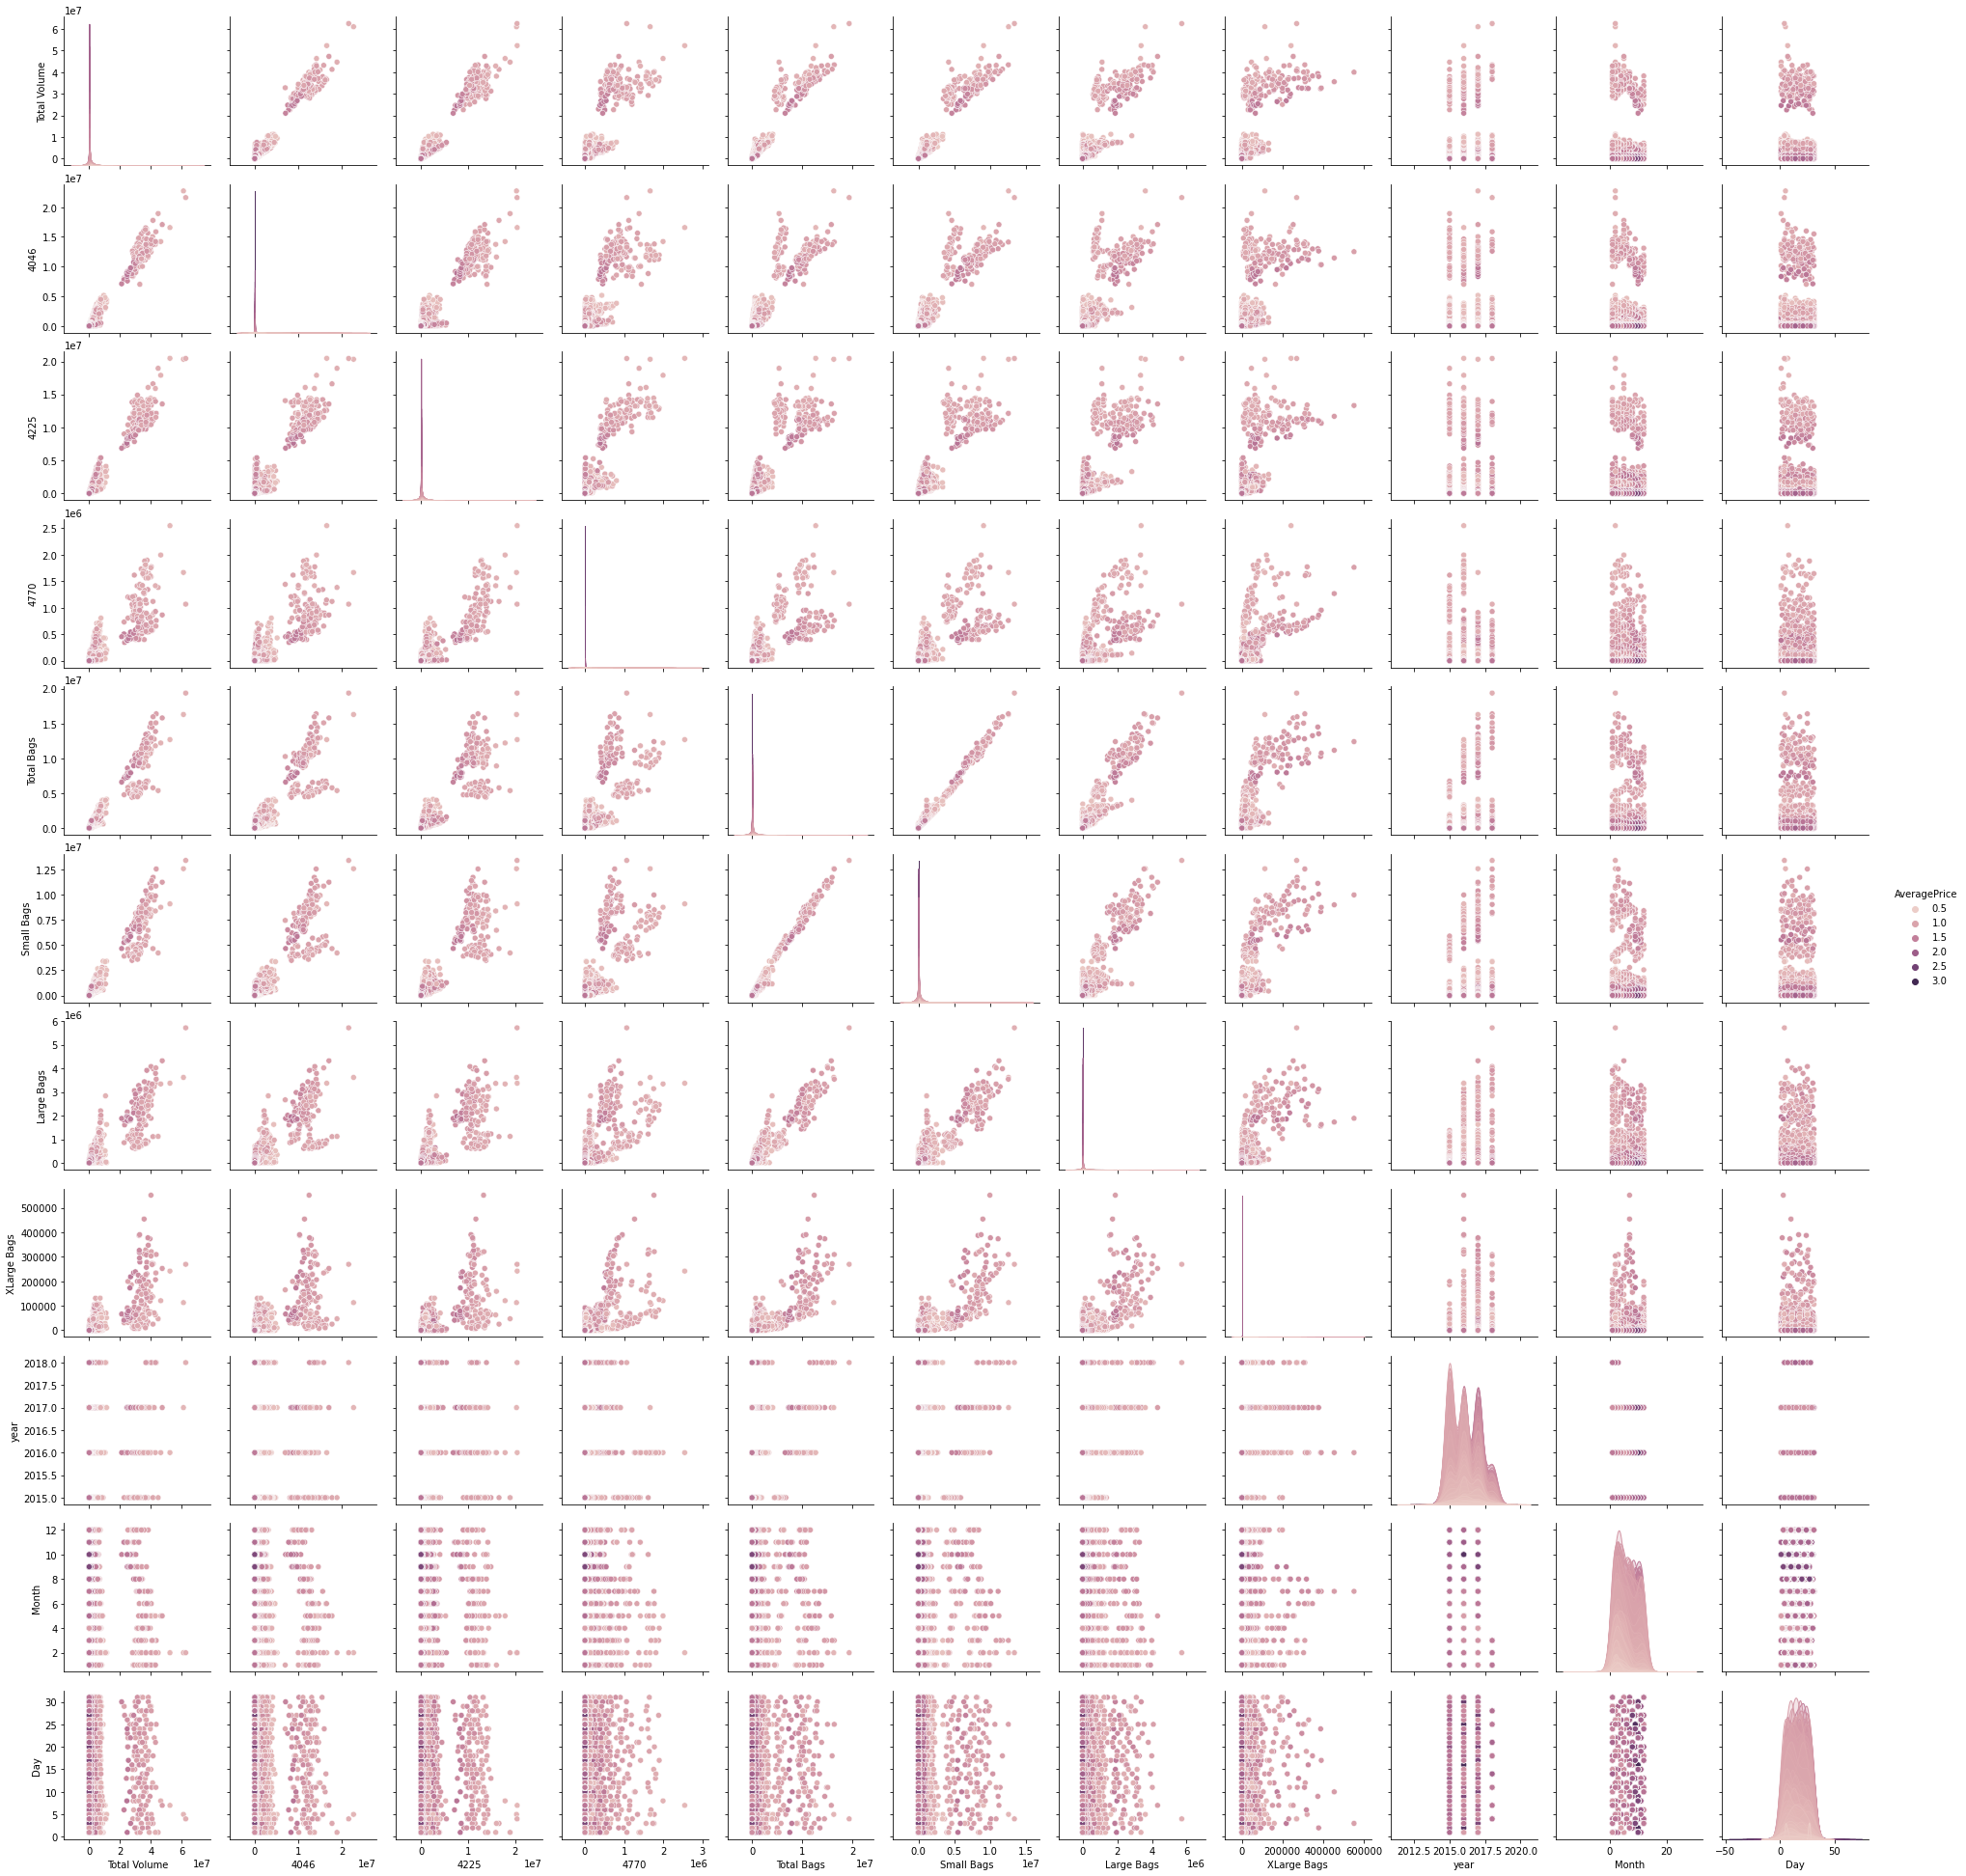

In [35]:
#pair ploting for price
sns.pairplot(price,hue="AveragePrice")

<AxesSubplot:>

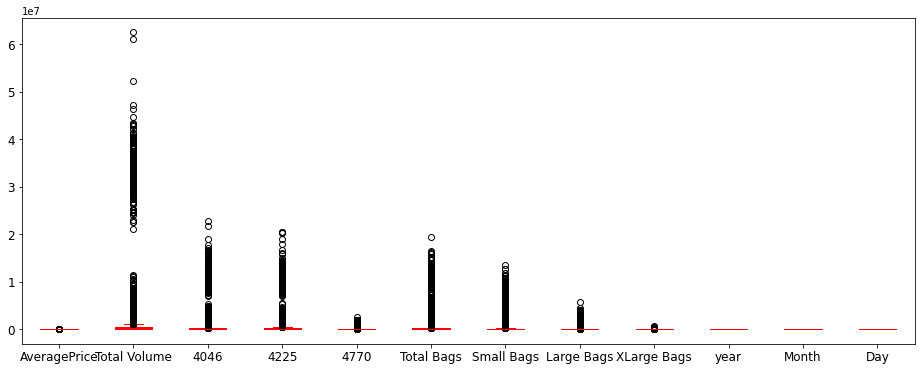

In [36]:
price.plot(kind='box',fontsize=12,figsize=(16,6),color='r')

In all the columns except year, month and day there are outliers.And these year,month,day.





In [35]:
#Features having outliers
price1=price[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [36]:
#removing outliers
from scipy import stats
from scipy.stats import zscore

z=np.abs(zscore(price1))

threshold=3
np.where(z>3)
data=price[(z<3).all(axis=1)]

In [37]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [38]:
data_loss=(18249-17782)/18249*100
data_loss

2.55904433119623

In [39]:
data.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

The skewness is not in range so i am applying power transformation

In [40]:
#using powertransforms
from sklearn.preprocessing import power_transform  

data[continuous_columns] = power_transform(data[continuous_columns], method='yeo-johnson')       
data = pd.DataFrame(data, columns = data.columns)
data['XLarge Bags']=np.log1p(data['XLarge Bags'])

In [41]:
data.skew()

AveragePrice    0.004164
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

now, it is good

In [42]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.116108,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,conventional,2015,Albany,12,27
1,-0.063731,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,conventional,2015,Albany,12,20
2,-1.300650,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,conventional,2015,Albany,12,13
3,-0.822900,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,conventional,2015,Albany,12,6
4,-0.249571,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,conventional,2015,Albany,11,29


# Preprocessing

In [43]:

k = ["type","region"]

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data[k]= data[k].apply(LE.fit_transform)

data[k].head()

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [44]:
data.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,0.615242,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-1.126094,1,2018,53,2,4
18245,0.792624,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-1.126094,1,2018,53,1,28
18246,1.128329,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-1.126094,1,2018,53,1,21
18247,1.248180,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-1.126094,1,2018,53,1,14
18248,0.592591,-0.658062,-0.351503,-0.787209,0.168008,-0.383676,-0.201685,-1.042930,-1.126094,1,2018,53,1,7


In [103]:

#corelation b/n features and target variable.
corr=data.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.587269,-0.565674,-0.459192,-0.503849,-0.570170,-0.496959,-0.486112,-0.400570,0.614982,0.098923,0.005438,0.158812,0.030665
Total Volume,-0.587269,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.565674,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.459192,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.503849,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.570170,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.496959,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.486112,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.400570,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885,0.010991
type,0.614982,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044,-0.002469


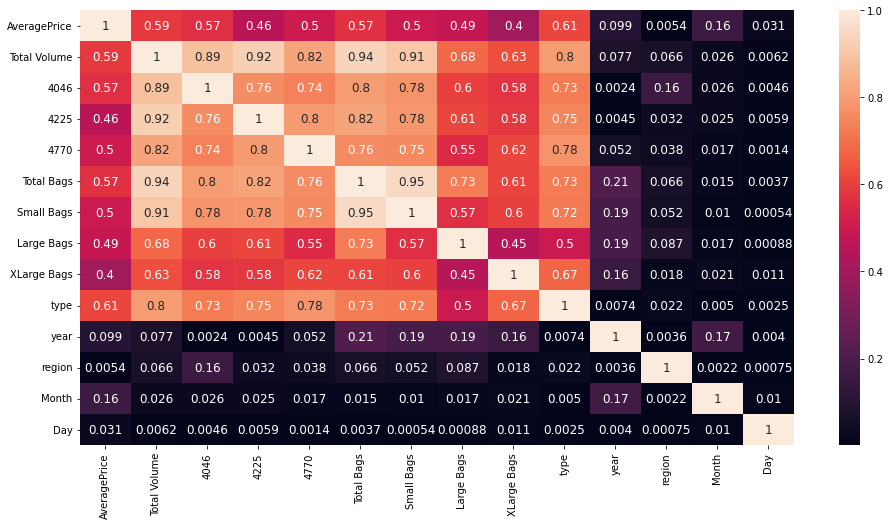

In [104]:
df_corr=data.corr().abs()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':12},)
plt.show()

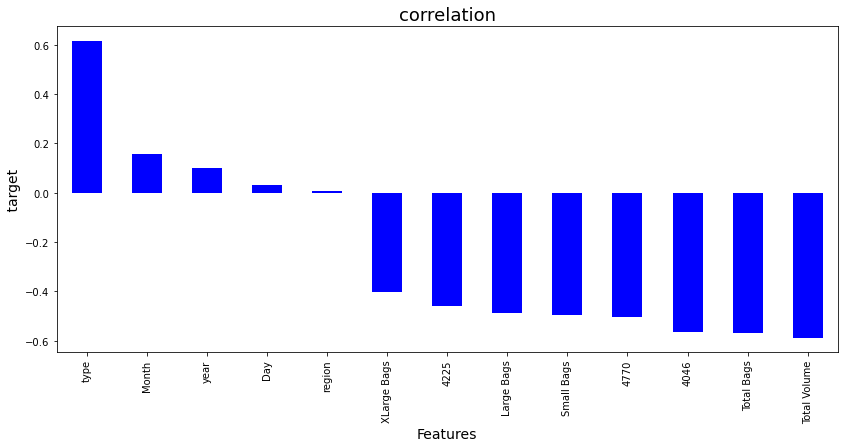

In [105]:
plt.figure(figsize=(14,6))
data.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel(' target ',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Day and region is very less comparing all other columns so i am droping those columns

In [50]:
#drop day and region column
data= data.drop(["Day"],axis=1)


data = data.drop(["region"],axis=1)

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression,Lasso,Ridge

from sklearn.metrics import  roc_curve,roc_auc_score,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
#fixing features and label

a=data.drop('AveragePrice', axis=1)
b=data['AveragePrice']

In [351]:
#normalizing using standard scaler
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.358706
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,1.979143,-1.185845
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,1.979143,-1.468572
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,1.979143,-1.468572
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,1.979143,-1.468572


In [352]:
x_scaled

array([[-0.0650939 , -0.64991752,  0.35827836, ..., -1.02644331,
        -1.21490801,  1.64143354],
       [-0.13726861, -0.77006683,  0.27635525, ..., -1.02644331,
        -1.21490801,  1.64143354],
       [ 0.21550256, -0.72450758,  0.65600965, ..., -1.02644331,
        -1.21490801,  1.64143354],
       ...,
       [-0.7663438 , -0.61035022, -0.77439502, ...,  0.97423793,
         1.97914269, -1.4685724 ],
       [-0.69259492, -0.53921073, -0.7116048 , ...,  0.97423793,
         1.97914269, -1.4685724 ],
       [-0.65806205, -0.35150339, -0.78720881, ...,  0.97423793,
         1.97914269, -1.4685724 ]])

In [353]:
#checking multicollineraity
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,51.806476,Total Volume
1,6.808776,4046
2,11.158951,4225
3,3.951861,4770
4,34.441003,Total Bags
5,16.630696,Small Bags
6,3.462408,Large Bags
7,2.065369,XLarge Bags
8,3.720176,type
9,1.386160,year


In [354]:
a=a.drop('Total Volume',axis=1)
a=a.drop('Total Bags',axis=1)

In [355]:
#checking multicollineraity
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,3.527072,4046
1,4.127765,4225
2,3.936426,4770
3,4.098464,Small Bags
4,1.864199,Large Bags
5,2.053482,XLarge Bags
6,3.484298,type
7,1.359151,year
8,1.051183,Month


Now, there is no multicollinearity problem

# Step4: Modelling

In [365]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [366]:
#finding the best random state
Accu_max=0
Rs_max=0
for k in range(1,153):
    x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.25, random_state=k)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The max r2 score is', Accu_max, 'at random state is', Rs_max)

The max r2 score is 0.5341100569628168 at random state is 23


In [368]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.23, random_state=157)

In [369]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lr)))


R2_score: 50.017690338790445
R2_score on training data: 52.02501352482379
Mean Absolute Error: 0.554059629681598
Mean Squared Error: 0.48632751705394206
Root Mean Squared Error: 0.6973718642546042


In [370]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rfr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rfr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))



R2_score: 88.1033776122316
R2_score on training data: 98.2914308195928
Mean Absolute Error: 0.2473278950943996
Mean Squared Error: 0.11575405111104545
Root Mean Squared Error: 0.3402264703268184


In [371]:
Dr=DecisionTreeRegressor()
Dr.fit(x_train,y_train)
pred_Dr=Dr.predict(x_test)
pred_train=Dr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_Dr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_Dr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_Dr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_Dr)))


R2_score: 74.4277560443316
R2_score on training data: 100.0
Mean Absolute Error: 0.3324685011633416
Mean Squared Error: 0.2488177515756068
Root Mean Squared Error: 0.49881635054958534


In [372]:
sv=SVR()
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
pred_train=sv.predict(x_train)
print('R2_score:',r2_score(y_test,pred_sv)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_sv))
print('Mean Squared Error:',mean_squared_error(y_test,pred_sv))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_sv)))


R2_score: 76.36635698082517
R2_score on training data: 78.70830929814137
Mean Absolute Error: 0.3650774115129141
Mean Squared Error: 0.22995517826929454
Root Mean Squared Error: 0.4795364201698287


In [376]:
tr=ExtraTreesRegressor()
tr.fit(x_train,y_train)
pred_tr=tr.predict(x_test)
pred_train=tr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_tr)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_tr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_tr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_tr)))


R2_score: 90.39755389879785
R2_score on training data: 100.0
Mean Absolute Error: 0.2202565113744372
Mean Squared Error: 0.09343173218076005
Root Mean Squared Error: 0.3056660468235883


In [374]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))


R2_score: 87.19278071705776
R2_score on training data: 91.639624018416
Mean Absolute Error: 0.2515621236795069
Mean Squared Error: 0.12461415241625995
Root Mean Squared Error: 0.35300729796458874


In [375]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
pred_train=gb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_gb)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_gb)))


R2_score: 73.11262028060543
R2_score on training data: 74.96853954715854
Mean Absolute Error: 0.3991284194430273
Mean Squared Error: 0.261614013190907
Root Mean Squared Error: 0.5114821728964822


In [377]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
pred_train=xgb.predict(x_train)
print('R2_score:',r2_score(y_test,pred_xgb)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_xgb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_xgb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_xgb)))


R2_score: 86.32929924905159
R2_score on training data: 94.37470836138357
Mean Absolute Error: 0.2750347856185167
Mean Squared Error: 0.13301582095066608
Root Mean Squared Error: 0.3647133407906353


In [378]:
las=Lasso()
las.fit(x_train,y_train)
pred_las=las.predict(x_test)
pred_train=las.predict(x_train)
print('R2_score:',r2_score(y_test,pred_las)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_las))
print('Mean Squared Error:',mean_squared_error(y_test,pred_las))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_las)))


R2_score: -0.0004616188525208287
R2_score on training data: 0.0
Mean Absolute Error: 0.8002240137377721
Mean Squared Error: 0.9730037793969298
Root Mean Squared Error: 0.9864095393886506


In [379]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd)*100)
print('R2_score on training data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))


R2_score: 50.01784462944545
R2_score on training data: 52.025012191790154
Mean Absolute Error: 0.5540596363360786
Mean Squared Error: 0.48632601580696755
Root Mean Squared Error: 0.6973707878933326


# Crossvalidation

In [380]:
from sklearn.model_selection import cross_val_score

In [381]:
score=cross_val_score(lr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[-0.2927364   0.20871117  0.43296886  0.15546857  0.15845947]
0.13257433334287877
Difference between R2 score and cross validation score is-  0.36760257004502567


In [382]:
score=cross_val_score(rfr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[-0.06437783  0.48197909  0.61950707  0.23954613 -0.04174111]
0.2469826696357705
Difference between R2 score and cross validation score is-  0.2531942337521339


In [383]:
score=cross_val_score(Dr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[-0.52867007  0.07823004  0.34655267 -0.72716321 -0.47776565]
-0.26176324380420696
Difference between R2 score and cross validation score is-  0.7619401471921114


In [384]:
score=cross_val_score(tr, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )


[-0.01273391  0.52573054  0.63022136  0.23083466  0.04335064]
0.28348065681535545
Difference between R2 score and cross validation score is-  0.216696246572549


In [385]:
score=cross_val_score(las, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[-2.87135431 -0.57598315 -0.06601187 -0.49746879 -0.93145667]
-0.9884549567044871
Difference between R2 score and cross validation score is-  1.4886318600923916


In [386]:
score=cross_val_score(xgb, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[0.1253505  0.65389138 0.62833408 0.27970427 0.16203325]
0.3698626960866667
Difference between R2 score and cross validation score is-  0.13031420730123772


In [387]:
score=cross_val_score(rd, a,b)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", r2_score(y_test, pred_lr)-score.mean() )

[-0.29269678  0.20875445  0.43298977  0.15544644  0.15847393]
0.13259356015822804
Difference between R2 score and cross validation score is-  0.3675833432296764


XGB model has very less score compare with others. it r2 score is 86.1% to increase these value i am using hyperparameter tuning.

# Step 5: Hyperparameter Tuning

In [409]:
#giving parameters
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [410]:
random_cv=RandomizedSearchCV(estimator=xgb,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)


In [414]:
random_cv.fit(x_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_ite

In [415]:
#finding best parameters
random_cv.best_estimator_


XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [452]:
final_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=10,
             min_child_weight=3, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)

final_model.fit(x_train,y_train)



XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=-1, grow_policy=None, importance_type='gain',
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [453]:
final_model.score(x_test,y_test)

0.8914891786864905

In [454]:
pred=final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))


R2_score: 89.14891786864905
Mean Absolute Error: 0.23501883018305128
Mean Squared Error: 0.10558095186193128
Root Mean Squared Error: 0.32493222656722015


Yes, now the r2 score is increased to 89%.

# Final step: Save the model

In [ ]:
#saving my model
import pickle

filename='Avocado Price prediction'
pickle.dump(xgb, open(filename,'wb'))


In [456]:
import pickle
loaded_model=pickle.load(open('Avocado Price prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.32929924905159


In [457]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089
original,-0.257801,0.784607,0.996872,1.691156,1.075784,1.149326,0.675405,0.375533,0.434407,0.907073,...,0.439633,0.339264,0.106679,0.462494,0.729690,0.563961,1.300252,0.734385,0.638120,-0.301080
predicted,-0.386782,0.900165,0.900165,1.168628,1.108047,1.384149,0.660221,0.140284,0.454352,-0.142509,...,-0.142509,1.148523,-0.063731,1.128329,0.835939,0.592591,1.716135,0.569831,0.454352,0.335991


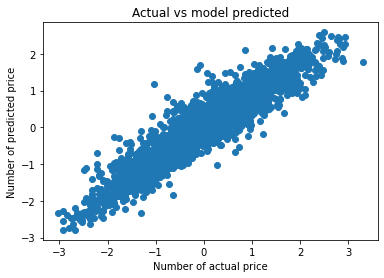

In [459]:
#plotting between actual and predicted score
plt.scatter(y_test,pred)
plt.xlabel('Number of actual price')
plt.ylabel('Number of predicted price')
plt.title('Actual vs model predicted')
plt.show()

Finally first task is completed predicting price.

# Predicting region


# ExtraTrees Classifier model

# Step1: import the libraries and load the data

In [45]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [46]:
price.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


#  Step 2:Exploratory Data Analysis

In [47]:
price.shape

(18249, 14)

In [48]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.116108,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,0,12,27
1,-0.063731,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,0,12,20
2,-1.300650,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,0,12,13
3,-0.822900,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,0,12,6
4,-0.249571,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,0,11,29


In [49]:

data['region'].value_counts()

0     338
24    338
1     338
28    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
40    338
41    338
42    338
43    338
44    338
47    338
48    338
49    338
50    338
26    338
27    338
11    338
5     338
7     338
8     338
9     338
10    338
23    338
12    338
13    338
14    338
3     338
16    338
17    338
18    338
19    338
20    338
2     338
21    338
4     338
53    335
25    333
22    331
29    325
46    307
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

here i am considering region as my target variable. it is multiclass classification.

In [50]:
#fixing features and label

A=data.drop('region', axis=1)
B=data['region']

In [51]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(A)
x_scaled
A=pd.DataFrame(scaler.fit_transform(A),columns=A.columns)
A

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.116108,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.641434,1.289235
1,-0.063731,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.641434,0.491750
2,-1.300650,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.641434,-0.305734
3,-0.822900,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,1.641434,-1.103219
4,-0.249571,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.358706,1.517088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,0.615242,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,1.979143,-1.185845,-1.331072
17778,0.792624,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,1.979143,-1.468572,1.403161
17779,1.128329,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,1.979143,-1.468572,0.605677
17780,1.248180,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,1.979143,-1.468572,-0.191808


In [52]:
x_scaled

array([[-0.1161076 , -0.0650939 , -0.64991752, ..., -1.21490801,
         1.64143354,  1.28923509],
       [-0.06373071, -0.13726861, -0.77006683, ..., -1.21490801,
         1.64143354,  0.4917504 ],
       [-1.30064978,  0.21550256, -0.72450758, ..., -1.21490801,
         1.64143354, -0.30573428],
       ...,
       [ 1.1283293 , -0.7663438 , -0.61035022, ...,  1.97914269,
        -1.4685724 ,  0.60567679],
       [ 1.24817977, -0.69259492, -0.53921073, ...,  1.97914269,
        -1.4685724 , -0.1918079 ],
       [ 0.59259122, -0.65806205, -0.35150339, ...,  1.97914269,
        -1.4685724 , -0.98929259]])

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(A.values,i) for i in range(len(A.columns))] 

vif['features']=A.columns
vif

,VIF values,features
0,2.316403,AveragePrice
1,53.111660,Total Volume
2,6.812419,4046
3,12.219417,4225
4,3.961707,4770
5,35.483871,Total Bags
6,17.313857,Small Bags
7,3.478304,Large Bags
8,2.065753,XLarge Bags
9,4.223846,type


In [54]:
A=A.drop('Total Volume',axis=1)
A=A.drop('Total Bags',axis=1)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(A.values,i) for i in range(len(A.columns))] 

vif['features']=A.columns
vif

,VIF values,features
0,2.069051,AveragePrice
1,3.591598,4046
2,4.349001,4225
3,3.950088,4770
4,4.159288,Small Bags
5,2.066030,Large Bags
6,2.054682,XLarge Bags
7,4.060821,type
8,1.461497,year
9,1.131667,Month


Now, no need to worry about multicollinearity

In [56]:
B.value_counts()

0     338
24    338
1     338
28    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
40    338
41    338
42    338
43    338
44    338
47    338
48    338
49    338
50    338
26    338
27    338
11    338
5     338
7     338
8     338
9     338
10    338
23    338
12    338
13    338
14    338
3     338
16    338
17    338
18    338
19    338
20    338
2     338
21    338
4     338
53    335
25    333
22    331
29    325
46    307
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

In [57]:
#balancing the label values.
from imblearn.over_sampling import SMOTE
sampling= SMOTE()

A,B=sampling.fit_resample(A,B)

In [58]:
B.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
52    338
53    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
51    338
Name: region, dtype: int64

#  Step 3:Modelling

In [59]:

scaler=StandardScaler()

x_scaled=scaler.fit_transform(A)
x_scaled

array([[-0.1190881 , -0.67026806,  0.33343333, ..., -1.21276335,
         1.64087443,  1.29082582],
       [-0.0664274 , -0.7901193 ,  0.25186728, ..., -1.21276335,
         1.64087443,  0.49231371],
       [-1.310049  , -0.74467308,  0.62986697, ..., -1.21276335,
         1.64087443, -0.3061984 ],
       ...,
       [-1.05628045,  0.79720121,  0.57276494, ..., -0.14760216,
        -1.4700119 ,  1.2021183 ],
       [-1.04743912,  1.36614158,  0.55369363, ...,  0.91755903,
         0.50610457,  0.49659553],
       [-1.48024357,  1.36163557,  0.73359059, ...,  1.98272022,
        -0.90850875,  0.26084973]])

In [60]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [61]:
#getting best random state
from sklearn.ensemble import RandomForestClassifier
Accu_max=0
Rs_max=0
for k in range(1,213):
    x_train,x_test,y_train,y_test=train_test_split(A,B, test_size=0.25, random_state=k)
    
    kn=KNeighborsClassifier()
    kn.fit(x_train,y_train)
    pred=kn.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The best accuracy is', Accu_max, 'at random state is', Rs_max)

The best accuracy is 0.635985097523559 at random state is 162


In [62]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(A,B, test_size=0.25, random_state=162)

In [63]:
def metric_score(clf, x_train,x_test,y_train,y_test,train=True):
    if train==False:
       
        
        pred=clf.predict(x_test)
        
        print("\n================ Test Result ================== ")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Reprt \n', classification_report(y_test,pred, digits=2))
        

In [64]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
metric_score(dc,x_train,x_test,y_train,y_test, train=True)
metric_score(dc,x_train,x_test,y_train,y_test, train=False)
y_pred=dc.predict(x_test)
probs_dc=dc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 79.947403%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.88      0.73      0.80        90
           1       0.72      0.71      0.72        82
           2       0.92      0.96      0.94        96
           3       0.78      0.76      0.77       105
           4       0.91      0.80      0.85        84
           5       0.72      0.76      0.74        87
           6       0.92      0.96      0.94        76
           7       0.80      0.82      0.81        92
           8       0.93      0.92      0.93        90
           9       0.85      0.78      0.81        86
          10       0.62      0.69      0.65        74
          11       0.85      0.85      0.85       103
          12       0.83      0.79      0.81        87
          13       0.73      0.75      0.74        83
          14       0.80      0.80      0.80        89
          15       0.99   

array([[66,  0,  0, ...,  0,  0,  0],
       [ 0, 58,  0, ...,  0,  0,  2],
       [ 0,  0, 92, ...,  0,  0,  1],
       ...,
       [ 0,  0,  0, ..., 84,  0,  0],
       [ 0,  1,  0, ...,  0, 85,  0],
       [ 0,  1,  1, ...,  0,  0, 52]], dtype=int64)

In [65]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
metric_score(kn,x_train,x_test,y_train,y_test, train=True)
metric_score(kn,x_train,x_test,y_train,y_test, train=False)
y_pred=kn.predict(x_test)
probs_kn=kn.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 63.598510%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.56      0.78      0.65        90
           1       0.31      0.50      0.38        82
           2       0.76      0.84      0.80        96
           3       0.73      0.67      0.70       105
           4       0.70      0.80      0.74        84
           5       0.48      0.57      0.52        87
           6       0.82      0.87      0.85        76
           7       0.52      0.70      0.59        92
           8       0.87      0.87      0.87        90
           9       0.46      0.65      0.54        86
          10       0.26      0.46      0.33        74
          11       0.73      0.78      0.75       103
          12       0.85      0.80      0.83        87
          13       0.47      0.43      0.45        83
          14       0.75      0.78      0.76        89
          15       0.91   

array([[70,  0,  0, ...,  0,  0,  0],
       [ 0, 41,  0, ...,  0,  0,  2],
       [ 0,  0, 81, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 84,  0,  0],
       [ 0,  0,  0, ...,  1, 82,  0],
       [ 0,  5,  1, ...,  0,  0, 35]], dtype=int64)

In [66]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)
y_pred=rfc.predict(x_test)
probs_rfc=rfc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 91.365330%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92        90
           1       0.90      0.90      0.90        82
           2       0.97      0.99      0.98        96
           3       0.91      0.84      0.87       105
           4       1.00      0.96      0.98        84
           5       0.89      0.90      0.89        87
           6       0.97      0.97      0.97        76
           7       0.92      0.92      0.92        92
           8       0.98      0.98      0.98        90
           9       0.96      0.91      0.93        86
          10       0.83      0.88      0.86        74
          11       0.93      0.94      0.94       103
          12       0.93      0.97      0.95        87
          13       0.85      0.89      0.87        83
          14       0.85      0.94      0.89        89
          15       0.99   

array([[82,  0,  0, ...,  0,  0,  0],
       [ 0, 74,  0, ...,  0,  0,  1],
       [ 0,  0, 95, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 84,  0,  0],
       [ 0,  0,  0, ...,  0, 93,  0],
       [ 0,  1,  1, ...,  0,  0, 61]], dtype=int64)

In [67]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
metric_score(GB,x_train,x_test,y_train,y_test, train=True)
metric_score(GB,x_train,x_test,y_train,y_test, train=False)
y_pred=GB.predict(x_test)
probs_GB=GB.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 83.388122%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        90
           1       0.79      0.71      0.75        82
           2       0.96      0.95      0.95        96
           3       0.87      0.73      0.79       105
           4       0.89      0.81      0.85        84
           5       0.77      0.85      0.81        87
           6       0.94      0.97      0.95        76
           7       0.85      0.88      0.87        92
           8       0.98      0.93      0.95        90
           9       0.87      0.79      0.83        86
          10       0.67      0.78      0.72        74
          11       0.89      0.80      0.84       103
          12       0.91      0.92      0.91        87
          13       0.84      0.78      0.81        83
          14       0.78      0.87      0.82        89
          15       0.98   

array([[75,  0,  0, ...,  0,  0,  0],
       [ 0, 58,  0, ...,  0,  0,  3],
       [ 0,  0, 91, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 84,  0,  0],
       [ 0,  0,  0, ...,  0, 93,  0],
       [ 0,  0,  1, ...,  0,  0, 53]], dtype=int64)

In [68]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
metric_score(bag,x_train,x_test,y_train,y_test, train=True)
metric_score(bag,x_train,x_test,y_train,y_test, train=False)
y_pred=bag.predict(x_test)
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 86.478194%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        90
           1       0.74      0.82      0.78        82
           2       0.91      0.98      0.94        96
           3       0.87      0.85      0.86       105
           4       0.95      0.93      0.94        84
           5       0.80      0.86      0.83        87
           6       0.93      0.99      0.96        76
           7       0.85      0.92      0.89        92
           8       0.96      0.98      0.97        90
           9       0.91      0.90      0.90        86
          10       0.70      0.86      0.77        74
          11       0.88      0.92      0.90       103
          12       0.91      0.91      0.91        87
          13       0.87      0.83      0.85        83
          14       0.84      0.91      0.87        89
          15       0.98   

array([[78,  0,  0, ...,  0,  0,  0],
       [ 0, 67,  0, ...,  0,  0,  0],
       [ 0,  0, 94, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 84,  0,  0],
       [ 0,  0,  0, ...,  0, 89,  0],
       [ 0,  1,  2, ...,  0,  0, 51]], dtype=int64)

In [69]:
Etc=ExtraTreesClassifier()
Etc.fit(x_train,y_train)
metric_score(Etc,x_train,x_test,y_train,y_test, train=True)
metric_score(Etc,x_train,x_test,y_train,y_test, train=False)
y_pred=Etc.predict(x_test)
probs_Etc=Etc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 93.052816%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        90
           1       0.96      0.95      0.96        82
           2       0.99      1.00      0.99        96
           3       0.95      0.84      0.89       105
           4       0.99      0.99      0.99        84
           5       0.90      0.92      0.91        87
           6       0.97      1.00      0.99        76
           7       0.94      0.95      0.94        92
           8       0.97      0.99      0.98        90
           9       0.96      0.91      0.93        86
          10       0.93      0.89      0.91        74
          11       0.96      0.97      0.97       103
          12       0.98      0.99      0.98        87
          13       0.86      0.92      0.89        83
          14       0.92      0.96      0.94        89
          15       1.00   

array([[86,  0,  0, ...,  0,  0,  0],
       [ 0, 78,  0, ...,  0,  0,  1],
       [ 0,  0, 96, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 84,  0,  0],
       [ 0,  0,  0, ...,  0, 93,  0],
       [ 0,  0,  1, ...,  0,  0, 64]], dtype=int64)

#  Crossvalidation

In [70]:
score=cross_val_score(dc, A,B)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.56121611 0.64365927 0.61260274 0.54931507 0.44438356]
0.5622353492944324
Difference between Accuracy score and cross validation score is-  -0.5414157130901809


In [71]:
score=cross_val_score(kn, A,B)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.44015338 0.45439606 0.44438356 0.40082192 0.34493151]
0.4169372849622734
Difference between Accuracy score and cross validation score is-  -0.3961176487580218


In [72]:
score=cross_val_score(GB, A,B)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.56778965 0.77184333 0.72219178 0.64273973 0.41890411]
0.6246937187409717
Difference between Accuracy score and cross validation score is-  -0.6038740825367201


In [73]:
score=cross_val_score(Etc, A,B)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.72089838 0.80197206 0.7890411  0.69013699 0.52547945]
0.7055055961399204
Difference between Accuracy score and cross validation score is-  -0.6846859599356687


In [74]:
score=cross_val_score(bag, A,B)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.60449192 0.76472199 0.71589041 0.63534247 0.47452055]
0.63899346773074
Difference between Accuracy score and cross validation score is-  -0.6181738315264884


In [75]:
score=cross_val_score(rfc, A,B)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.69186524 0.83319638 0.78630137 0.69452055 0.51506849]
0.7041904075820848
Difference between Accuracy score and cross validation score is-  -0.6833707713778332


# Step4: Hyperparameter tuning

In [76]:
#GridSearchCV
grid_param={
    'n_neighbors':[5,7,9,11,12],
    'weights': ["uniform","distance"],
    'metric':["minkowski"],
    'algorithm':["auto", "ball_tree", "kd_tree", "brute"],
    'leaf_size': [30,34,37,39,42,47]
}
    

In [77]:

grid_search=GridSearchCV(kn, grid_param, verbose=3)
                        

In [78]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.579 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.576 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.564 total time=   0.1s
[CV 4/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.595 total time=   0.1s
[CV 5/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.587 total time=   0.1s
[CV 1/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=distance;, score=0.601 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=5, weights=distance;, score=0.595 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=30, metric=minkowski

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 34, 37, 39, 42, 47],
                         'metric': ['minkowski'],
                         'n_neighbors': [5, 7, 9, 11, 12],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [79]:
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 5,
 'weights': 'distance'}

In [80]:
final_model2=KNeighborsClassifier(algorithm='brute',leaf_size=200, metric='minkowski',n_neighbors=4,weights='distance')

In [81]:
final_model2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=200, n_neighbors=4,
                     weights='distance')

In [82]:
metric_score(final_model2,x_train,x_test,y_train,y_test,train=False)


================ Test Result ================== 
Accuracy Score: 64.694280%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        90
           1       0.51      0.43      0.47        82
           2       0.83      0.79      0.81        96
           3       0.79      0.67      0.72       105
           4       0.76      0.69      0.72        84
           5       0.47      0.53      0.50        87
           6       0.85      0.84      0.85        76
           7       0.48      0.54      0.51        92
           8       0.89      0.86      0.87        90
           9       0.59      0.55      0.57        86
          10       0.31      0.42      0.35        74
          11       0.82      0.69      0.75       103
          12       0.93      0.79      0.86        87
          13       0.44      0.47      0.46        83
          14       0.79      0.84      0.82        89
          15       0.95   

In [83]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(20,42),
    'min_samples_leaf': range(1,4),
    'min_samples_split':range(1,5),
    'max_leaf_nodes' :range(20,40)
}

In [84]:
grid_search=GridSearchCV(estimator=Etc,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)

In [85]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(20, 42),
                         'max_leaf_nodes': range(20, 40),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(1, 5)})

In [445]:
#finding the best parameters
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 40, 'max_leaf_nodes': 39, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [506]:
final_model_Etc=ExtraTreesClassifier( max_depth= 6751, max_leaf_nodes=6631, min_samples_leaf= 1, min_samples_split=2)
final_model_Etc.fit(x_train,y_train)
metric_score(final_model_Etc,x_train,x_test,y_train,y_test,train=False)



================ Test Result ================== 
Accuracy Score: 93.403463%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        90
           1       0.90      0.93      0.92        82
           2       0.99      1.00      0.99        96
           3       0.93      0.84      0.88       105
           4       1.00      0.98      0.99        84
           5       0.91      0.92      0.91        87
           6       0.99      1.00      0.99        76
           7       0.94      0.96      0.95        92
           8       0.98      1.00      0.99        90
           9       0.96      0.94      0.95        86
          10       0.91      0.91      0.91        74
          11       0.96      0.99      0.98       103
          12       0.97      0.99      0.98        87
          13       0.88      0.90      0.89        83
          14       0.92      0.98      0.95        89
          15       1.00   

As per the crossvalidation i have choose KNeighborsclassifier model but i am not satisfied with result after hyperparameter tuning. so i have choose Extratreeclassifier model, it gives good result.

   Finally, the Accuracy_score after tuning is (93.4%) increased by 0.4%

# Final step: save the model

In [510]:
#saving my model
import pickle

filename='Avocado region prediction'
pickle.dump(Etc, open(filename,'wb'))


In [511]:
import pickle
loaded_model=pickle.load(open('Avocado region prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

93.0528161297392


Done